# Lotka-Volterra simulator: joint ratio variance vs theta distance

In [14]:
import numpy as np
import corner
from matplotlib import pyplot as plt
%matplotlib inline
import logging
import matplotlib

from goldmine.simulators.lotka_volterra import LotkaVolterra

logging.basicConfig(format='%(asctime)s  %(message)s', datefmt='%H:%M')
logging.getLogger().setLevel(logging.INFO)

## Run simulator and collect log r, t

In [15]:
simulator = LotkaVolterra()
theta0 = simulator.theta_defaults(single_theta=True)[0][0]
print(theta0)

[-4.60517019 -0.69314718  0.         -4.60517019]


In [16]:
dmin, dmax = 0.001, 1.
n_thetas = 50
n_samples = 50

In [19]:
dthetas = []
log_r_xz = []
t_xz = []

distances = np.exp(np.log(dmin) + (np.log(dmax) - np.log(dmin)) * np.random.rand(n_thetas))
r_variances = []
r_means = []

for i_theta, distance in enumerate(distances):
    logging.info('Starting simulation for distance %s', distance)
    
    dtheta = np.random.rand(4)
    dtheta *= distance / np.linalg.norm(dtheta)
    theta1 = theta0 + dtheta
    
    x, this_r_xz = simulator.rvs_ratio(theta0, theta1, theta0, n_samples)
    
    logging.info('  Var[r(x,z)] = %s', np.var(this_r_xz, dtype=np.float64))
    logging.info('  E[r(x,z)]   = %s', np.mean(this_r_xz, dtype=np.float64))
    
    r_variances.append(np.var(this_r_xz, dtype=np.float64))
    r_means.append(np.mean(this_r_xz, dtype=np.float64))

r_variances = np.array(r_variances)
r_means = np.array(r_means)


12:03  Starting simulation for distance 0.019127055987304017
12:04    Var[r(x,z)] = 0.6715231565838026
12:04    E[r(x,z)]   = 0.9917208282205361
12:04  Starting simulation for distance 0.3812689657259174
12:04    Var[r(x,z)] = 2.650132003798797e-24
12:04    E[r(x,z)]   = 3.394866678288708e-13
12:04  Starting simulation for distance 0.0011492012549771853
12:05    Var[r(x,z)] = 0.001551640888582853
12:05    E[r(x,z)]   = 1.002397714063408
12:05  Starting simulation for distance 0.005116871207769349
12:06    Var[r(x,z)] = 0.026514705245265013
12:06    E[r(x,z)]   = 0.996338467253369
12:06  Starting simulation for distance 0.015562693408459899
12:06  Too many steps in simulation. Total rate: 98274.0
12:06    Var[r(x,z)] = 0.3539216738321593
12:06    E[r(x,z)]   = 1.0086122889136875
12:06  Starting simulation for distance 0.0034752095012776604
12:07    Var[r(x,z)] = 0.015840877507029415
12:07    E[r(x,z)]   = 0.9919641603866174
12:07  Starting simulation for distance 0.03369186444455609
12:

12:35  Too many steps in simulation. Total rate: 98452.0
12:35    Var[r(x,z)] = 1.1149551619301327e-62
12:35    E[r(x,z)]   = 1.5462585606392679e-32


## Plot theta distance vs r variance

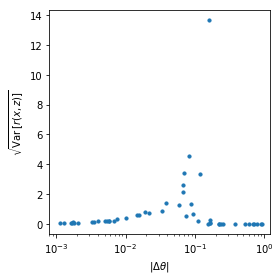

In [24]:
fig = plt.figure(figsize=(4,4))
ax = plt.gca()

sc = plt.scatter(distances, r_variances**0.5, s=10.)

plt.xlabel(r'$|\Delta \theta|$')
plt.ylabel(r'$\sqrt{\mathrm{Var}\,[r(x,z)]}$')
plt.xlim(0.0008,1.2)
#plt.ylim(0.,11.)
ax.set_xscale("log", nonposx='clip')
#ax.set_yscale("log", nonposy='clip')

plt.tight_layout()
#plt.savefig('lv_local_model_zoom.pdf')
plt.show()

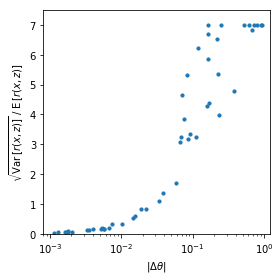

In [27]:
fig = plt.figure(figsize=(4,4))
ax = plt.gca()

sc = plt.scatter(distances, r_variances**0.5 / r_means, s=10.)

plt.xlabel(r'$|\Delta \theta|$')
plt.ylabel(r'$\sqrt{\mathrm{Var}\,[r(x,z)]}\;/\;\mathrm{E}\,[r(x,z)]$')
plt.xlim(0.0008,1.2)
plt.ylim(0.,7.5)
ax.set_xscale("log", nonposx='clip')
#ax.set_yscale("log", nonposy='clip')

plt.tight_layout()
plt.savefig('lv_joint_ratio_variance.pdf')
plt.show()